# Blackjack at a Casino

This note book is to explore outcomes of over 1 million blackjack hands played on 50 different tables with deck size of 20 sets with random number of players ranging between 1 to 6 per round

The data is generated using this python [script]. The hit or pass decision for both the dealer and player is based solely on their current hand value. That is, keep hitting until the hand value is >17. Let's see what we can understand from these games.
[script]:https://github.com/anilmarella/blackjack/blob/master/generate_blackjack_data.py

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
black_jack_df = pd.read_csv('blackjack_data.csv')
print('Number of rows in the dataset is', black_jack_df.shape[0])
print('\nNumber of columns in the dataset is', black_jack_df.shape[1])
print('\nColumns in the dataset are')
print(black_jack_df.columns)
print('\nPeak at the data')
print(black_jack_df.head())

Number of rows in the dataset is 1000003

Number of columns in the dataset is 8

Columns in the dataset are
Index(['TableNum', 'NumPlayers', 'PlayerHand', 'PlayerHandValue',
       'DealerOpenCard', 'DealerHand', 'DealerHandValue', 'Winner'],
      dtype='object')

Peak at the data
   TableNum  NumPlayers                      PlayerHand  PlayerHandValue  \
0        12           5           King_Diamonds:9_Clubs               19   
1        49           6  2_Diamonds:Queen_Clubs:8_Clubs               20   
2        43           6          2_Spades:King_Diamonds               12   
3        12           4           King_Clubs:Jack_Clubs               20   
4        27           6    3_Diamonds:9_Hearts:9_Spades               21   

  DealerOpenCard                             DealerHand  DealerHandValue  \
0       3_Hearts  3_Hearts:4_Spades:9_Spades:5_Diamonds               21   
1     7_Diamonds          7_Diamonds:2_Clubs:Jack_Clubs               19   
2     Ace_Hearts                

First of all let us see how many hands did each one win.

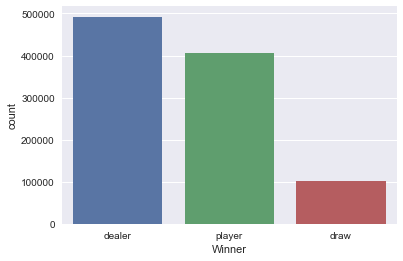

In [3]:
sns.countplot(x='Winner', data=black_jack_df)

It looks like the dealer on a average wins more hands. This is obvious because the player gets to go first and the dealer won't even play if the players busts out. 

Next, it would be nice to see how Dealer winning varies on the Dealer's open card.

In [4]:
black_jack_df['DealerOpenCardValue'] = black_jack_df['DealerOpenCard'].str.split('_').apply(lambda x : x[0])

In [5]:
order = ['Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']

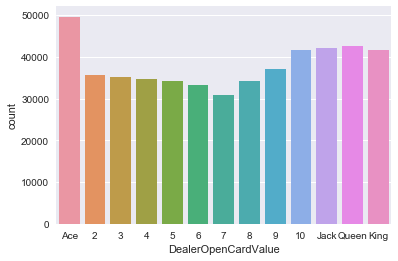

In [6]:
sns.countplot(x='DealerOpenCardValue', data=black_jack_df[black_jack_df['Winner'] == 'dealer'], order=order)

Now we know what to do when we see an Ace on the Dealer's open card. Let's further see how many times the dealer gets busted for each of the open card.

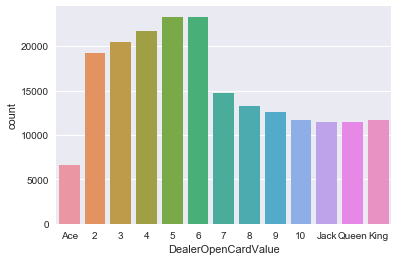

In [7]:
sns.countplot(x='DealerOpenCardValue', data=black_jack_df[black_jack_df['DealerHandValue'] > 21], order=order)

Dealer has the highest bust rate at 4,5,6 open cards. Something to keep in mind for the next visit to a Casino